In [1]:
import tensorflow as tf

c:\users\oriamu01\appdata\local\continuum\anaconda3\envs\tensortest\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\oriamu01\appdata\local\continuum\anaconda3\envs\tensortest\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\oriamu01\appdata\local\continuum\anaconda3\envs\tensortest\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("q

In [2]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [3]:
import numpy as np
import os
from scipy.io import wavfile

DATADIRtrain = "C:\\Users\\oriamu01\\Desktop\\Convs2\\"
CATEGORIES = ["IR_1_aula_carolina",
              "IR_2_booth",
              "IR_3_lecture_theatre",
              "IR_4_meeting_room",
              "IR_5_stairway",
              "IR_6_corridor",
              "IR_7_kitchen",
              "IR_8_bathroom"]

NAME = "MultiOut-600x8-3-secs-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs\\{}'.format(NAME))

In [4]:
training_data = []

def create_training_data():

    for category in CATEGORIES:
        path = os.path.join(DATADIRtrain, category)
        class_num = (CATEGORIES.index(category))
        for file in os.listdir(path):
            try:
                wavdata = wavfile.read(os.path.join(path,file))
                trunc_wav = np.resize(wavdata[1],(3*44100,)) #only take the first 4 seconds of each wav
                training_data.append([trunc_wav, class_num])
            except Exception as e:
                pass

create_training_data()

In [5]:
#for sample in training_data:
import matplotlib.pyplot as plt
print (training_data[1])
plt.plot(training_data[1][0])


[array([0.01914372, 0.01914459, 0.01914506, ..., 0.01935213, 0.01931192,
       0.01925904]), 0]


In [15]:
import random
random.shuffle(training_data)



[array([0.00846766, 0.00847366, 0.00834511, ..., 0.04603067, 0.06892135,
       0.02146545]), 5]


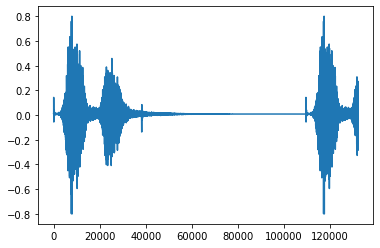

In [16]:
#for sample in training_data:
print (training_data[1])
plt.plot(training_data[1][0])

In [8]:
#training data
Xtr = []
ytr = []



In [9]:
for features, labels in training_data:
        Xtr.append(features)
        ytr.append(labels)

In [10]:
xtr = np.array(Xtr)
Ytr = np.array(ytr)

In [11]:
newxtr = xtr.reshape(len(xtr),300,441)
newYtr = Ytr.reshape(len(Ytr))
print(newYtr.shape)
print(Ytr.shape)
print(xtr.shape)
print(newxtr.shape[1:])


(4780,)
(4780,)
(4780, 132300)
(300, 441)


In [17]:


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import Conv1D, Conv2D, GlobalAveragePooling1D, MaxPooling1D

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,))
#model.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid,))



model = Sequential()

model.add(Conv1D(6, 1, activation='relu', input_shape= newxtr.shape[1:])) #400 samples in 441 steps = 4 seconds
model.add(Conv1D(6, 1, activation='relu'))
model.add(MaxPooling1D(3)) # maxpool / downsample features by a third

model.add(Conv1D(10, 1, activation='relu'))
model.add(Conv1D(10, 1, activation='relu'))
model.add(GlobalAveragePooling1D())

model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(newxtr, Ytr, epochs=200, validation_split=0.1, callbacks=[tensorboard])


Train on 4302 samples, validate on 478 samples
Epoch 1/200
4302/4302 [==============================] - 10s 2ms/sample - loss: 2.0763 - acc: 0.1251 - val_loss: 2.0717 - val_acc: 0.1172
Epoch 2/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 2.0678 - acc: 0.1464 - val_loss: 2.0630 - val_acc: 0.1423
Epoch 3/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 2.0683 - acc: 0.1553 - val_loss: 2.0588 - val_acc: 0.1569
Epoch 4/200
4302/4302 [==============================] - 10s 2ms/sample - loss: 2.0562 - acc: 0.1511 - val_loss: 2.0469 - val_acc: 0.1841
Epoch 5/200
4302/4302 [==============================] - 9s 2ms/sample - loss: 2.0449 - acc: 0.1578 - val_loss: 2.0401 - val_acc: 0.1799
Epoch 6/200
4302/4302 [==============================] - 9s 2ms/sample - loss: 2.0312 - acc: 0.1776 - val_loss: 2.0243 - val_acc: 0.1862
Epoch 7/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 2.0214 - acc: 0.1681 - val_loss: 2.0163 - val_acc:

4302/4302 [==============================] - 8s 2ms/sample - loss: 1.7244 - acc: 0.2917 - val_loss: 1.7040 - val_acc: 0.3117
Epoch 61/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 1.7283 - acc: 0.2906 - val_loss: 1.7301 - val_acc: 0.2741
Epoch 62/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.7346 - acc: 0.2920 - val_loss: 1.7131 - val_acc: 0.2971
Epoch 63/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.7249 - acc: 0.2913 - val_loss: 1.6933 - val_acc: 0.3285
Epoch 64/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 1.7454 - acc: 0.2829 - val_loss: 1.7273 - val_acc: 0.2866
Epoch 65/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 1.7238 - acc: 0.2992 - val_loss: 1.7330 - val_acc: 0.3033
Epoch 66/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 1.7838 - acc: 0.2583 - val_loss: 1.7367 - val_acc: 0.2762
Epoch 67/200
4302/4302 [=======================

4302/4302 [==============================] - 9s 2ms/sample - loss: 1.6658 - acc: 0.3119 - val_loss: 1.6695 - val_acc: 0.3264
Epoch 120/200
4302/4302 [==============================] - 9s 2ms/sample - loss: 1.6753 - acc: 0.3115 - val_loss: 1.6725 - val_acc: 0.3054
Epoch 121/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 1.6576 - acc: 0.3150 - val_loss: 1.6734 - val_acc: 0.3159
Epoch 122/200
4302/4302 [==============================] - 8s 2ms/sample - loss: 1.6560 - acc: 0.3145 - val_loss: 1.6694 - val_acc: 0.3347
Epoch 123/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6542 - acc: 0.3178 - val_loss: 1.7026 - val_acc: 0.3138
Epoch 124/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6733 - acc: 0.3157 - val_loss: 1.6852 - val_acc: 0.3075
Epoch 125/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6664 - acc: 0.3096 - val_loss: 1.6792 - val_acc: 0.3054
Epoch 126/200
4302/4302 [================

4302/4302 [==============================] - 10s 2ms/sample - loss: 1.6414 - acc: 0.3240 - val_loss: 1.6928 - val_acc: 0.3033
Epoch 178/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6373 - acc: 0.3371 - val_loss: 1.6667 - val_acc: 0.3013
Epoch 179/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6138 - acc: 0.3466 - val_loss: 1.6638 - val_acc: 0.3159
Epoch 180/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6417 - acc: 0.3231 - val_loss: 1.6876 - val_acc: 0.3243
Epoch 181/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6243 - acc: 0.3389 - val_loss: 1.6631 - val_acc: 0.3222
Epoch 182/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6122 - acc: 0.3477 - val_loss: 1.6521 - val_acc: 0.3159
Epoch 183/200
4302/4302 [==============================] - 7s 2ms/sample - loss: 1.6133 - acc: 0.3410 - val_loss: 1.6640 - val_acc: 0.3285
Epoch 184/200
4302/4302 [===============